<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_DS_DeepLearning_Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Deep Learning: previsão com Keras</b></font>

<font color=gray size=2><a href=https://colab.research.google.com/drive/1STGO5gr4pSsK_cwowovBK1uYIMDDNoGE>Arquivo Colab</a></font>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href=https://cursos.alura.com.br/course/deep-learning-previsao-keras><font size=2 color=gray>Deep Learning: previsão com Keras</a>
<li>Carga Horária: 10 h
<li>Instrutora: Allan Spadini
<li>Data de Início: 08-2022
</ul>

<hr color=gray><br>
<h3><b>Conteúdo / Aprendizagem:</b></h3>

- Escalonamento de vetores
- Separação dos conjuntos (x,y,treino e teste)
- Modelo de regressão linear com o Keras
- Avaliação de modelo
- Obtenção dos valores em verdadeira grandeza
- Séries Temporais
    - Datas com x
    - Próprio vetor como x
        - Janelas de deslocamento
    

+ E se utilizarmos médias móveis?
+ E na previsão de valores ações? É eficiente?

# <font color=orange>RESUMO</font>

<a href=https://docs.google.com/spreadsheets/d/1tTygYlq9r7nkUsw9a25N5_z57-de_59tSBCIVPw6KUw><font size=2 color=gray>ROTEIROS Data Science</font></a>

* <font color=orange><b>

* 

# <font color=orange>**CURSO**</font>

**Projeto**: neste curso será abordado o uso do Keras para elaboração de estudos preditivos de séries temporais.

Essa operação é interessante quando deseja-se realizar um **planejamento futuro**.


<a href=https://github.com/alura-cursos/deeptime/archive/aula5.zip><font size=2; color=gray>Material de referencial do curso</a></font>

## Dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Download dos dados
uri = 'https://github.com/alura-cursos/deeptime/raw/aula1/Passageiros.csv'

passageiros = pd.read_csv(uri)
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


## Descrição

In [3]:
# Configuração da imagem
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 12

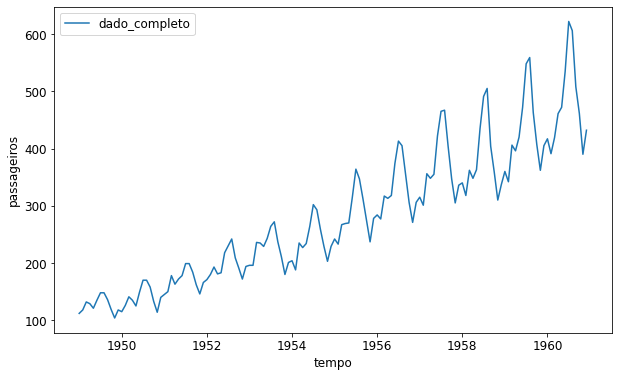

In [4]:
# Visualização da série temporal
sns.lineplot(data=passageiros, x='tempo', y='passageiros', label='dado_completo')

<font color=orange>PERGUNTA DE NEGÓCIO:</font> Quantos serão os passageiros no futuro?

# Modelagem



## Escalando vetores

Para treinar o modelo com redes neurais é recomendado que os dados estejam todos na mesma escala.

* Padronização
* Escala de Mín e Máx



* Escalar com todos os dado?
* Escalar somente os dados de treino?

In [5]:
# Normalização - padronização
from sklearn.preprocessing import StandardScaler
# Por que não o MinMax

sc = StandardScaler()
dado_escalado = sc.fit_transform(passageiros)
# -> np.Array

## Separação de X e Y

In [6]:
# X e Y
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'Data')

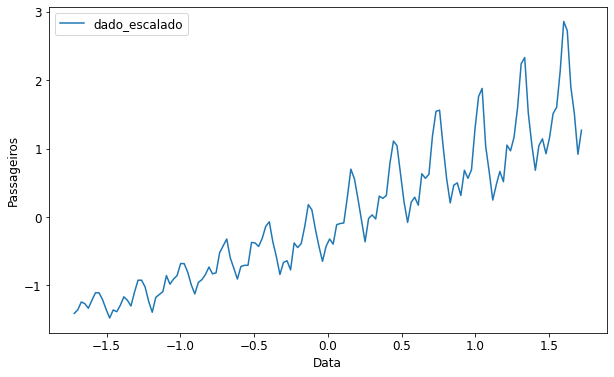

In [7]:
# Visualização
sns.lineplot(x=x,y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

## Separação de Treino e Teste

In [8]:
# Treino e teste - em séries temporais
tamanho_treino = int(len(passageiros) * 0.9)  # 90% dos dados
# tamanho_teste = len(passageiros) - tamanho_treino  # 10% dos dados

In [9]:
# X e Y de Treino e Teste
xtreino = x[ :tamanho_treino]
ytreino = y[ :tamanho_treino]

xteste = x[tamanho_treino: ]
yteste = y[tamanho_treino: ]

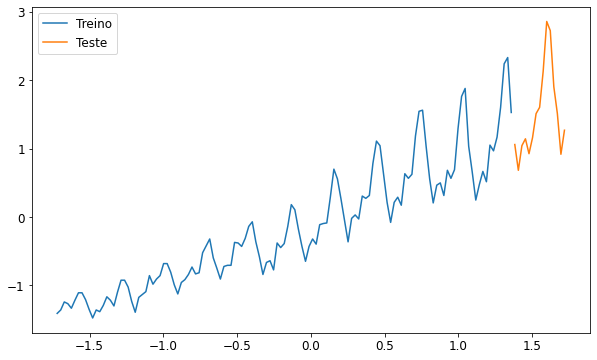

In [10]:
sns.lineplot(x=xtreino, y=ytreino, label='Treino')
sns.lineplot(x=xteste, y=yteste, label='Teste')

## Formulação do modelo

$$z = W*x + b$$

- $W$ - Weights
- $b$ - Bias

<center>Entrada [ Data ] → FUNÇÃO DP → Saída [ Passageiros ]</center>

![Esquema de rede neural](https://lh3.googleusercontent.com/jcK3PwyJCzuNV9oHD1wYxnATGVLupvrvDRodBGPhzWdOOC-iHo7mH90pRrBLn9PRkF4FRnddZ2hFgA8ZPf9Mhlpes0J9I11Xb-EjKAjrStdVUgK7_9_b4cElUu0YWkHp8QEJUseJ0SnFl4xGq2Y7sHI)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

regressor = Sequential()
regressor.add(Dense(
    units = 1,  # número de dimensões da saída
    input_dim = 1,
    kernel_initializer='Ones',  # pesos da camada de entrada = 1
    use_bias = False,
    activation = 'linear'
    )
)

regressor.compile(loss='mean_squared_error',
    optimizer='adam')

O primeiro (`unit`)é o tamanho da camada seguinte, a camada de saída, neste caso. O `input_dim` é o tamanho da entrada.


## Avaliação do modelo

In [12]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [13]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 1s 11ms/step - loss: 0.1285


In [14]:
y_predict = regressor.predict(xtreino)

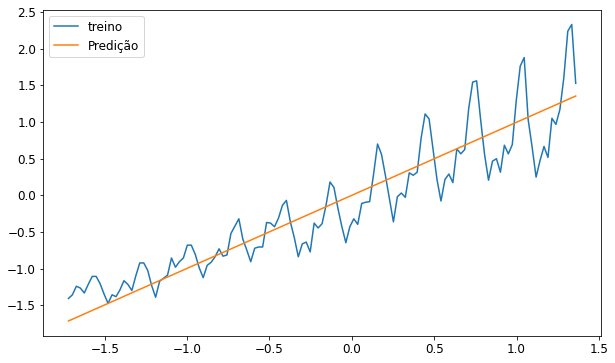

In [15]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='Predição')

## Reescalando variáveis

In [16]:
# Tabulação dos vetores
d = {'tempo': xtreino,
     'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(d)
resultados

,tempo,passageiros
0,-1.720064,-1.714657
1,-1.696007,-1.690676
2,-1.671950,-1.666694
3,-1.647894,-1.642713
4,-1.623837,-1.618732
...,...,...
124,1.262984,1.259014
125,1.287041,1.282995
126,1.311098,1.306976
127,1.335155,1.330957


In [17]:
# Transformação reversa
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf, columns=['tempo','passageiros'])
resultado_transf

,tempo,passageiros
0,1949.000000,75.313045
1,1949.083333,78.179962
2,1949.166667,81.046907
3,1949.250000,83.913824
4,1949.333333,86.780769
...,...,...
124,1959.333333,430.812487
125,1959.416667,433.679432
126,1959.500000,436.546349
127,1959.583333,439.413280


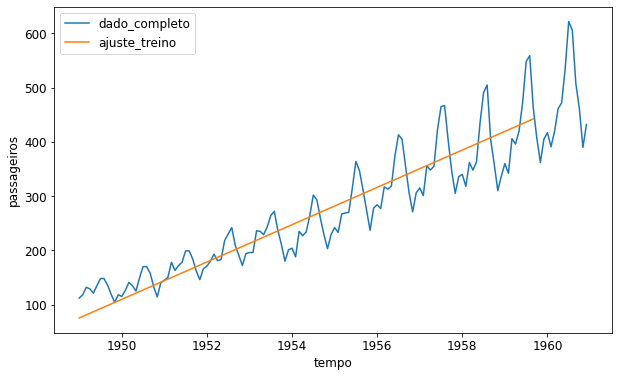

In [18]:
sns.lineplot(data=passageiros,
    x='tempo', y='passageiros', label='dado_completo')

sns.lineplot(data=resultado_transf,
    x='tempo', y='passageiros', label='ajuste_treino')

In [19]:
y_predict_teste = regressor.predict(xteste)

In [20]:
# Tabulação dos vetores
d = {'tempo': xteste,
     'passageiros': y_predict_teste[:,0]}
resultados = pd.DataFrame(d)

# Transformação reversa
resultado_transf_teste = sc.inverse_transform(resultados)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste, columns=['tempo','passageiros'])
resultado_transf_teste

,tempo,passageiros
0,1959.750000,445.147142
1,1959.833333,448.014087
2,1959.916667,450.881004
3,1960.000000,453.747935
4,1960.083333,456.614866
5,1960.166667,459.481798
6,1960.250000,462.348743
7,1960.333333,465.215660
8,1960.416667,468.082591
9,1960.500000,470.949522


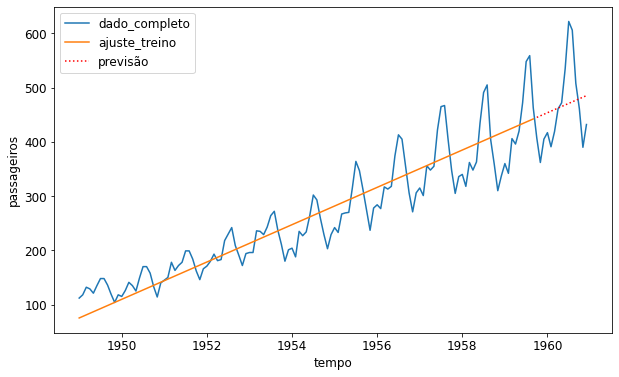

In [21]:
sns.lineplot(data=passageiros,
    x='tempo', y='passageiros', label='dado_completo')

sns.lineplot(data=resultado_transf,
    x='tempo', y='passageiros', label='ajuste_treino')

sns.lineplot(data=resultado_transf_teste,
    x='tempo', y='passageiros', label='previsão', color='r', linestyle=':')

## Modelo 2

In [22]:
regressor2 = Sequential()

regressor2.add(Dense(
    units=8, input_dim=1, 
    kernel_initializer='random_uniform',
    activation='linear', use_bias=False
))
regressor2.add(Dense(
    units=8,
    kernel_initializer='random_uniform',
    activation='linear', use_bias=False
))
regressor2.add(Dense(
    units=1,
    kernel_initializer='random_uniform',
    activation='linear', use_bias=False
))

# Compilador
regressor2.compile(loss='mean_squared_error',
    optimizer='adam')

In [23]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [24]:
regressor2.fit(xtreino, ytreino, 
    epochs=200
    )

Epoch 1/200
5/5 [==============================] - 1s 5ms/step - loss: 0.8097
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 0.8094
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8090
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8084
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8073
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8056
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8033
Epoch 8/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7997
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7946
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7878
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.7792
Epoch 12/200
5/5 [==============================] - 0s 6ms/step - loss: 0.7682
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

In [25]:
y_predict = regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

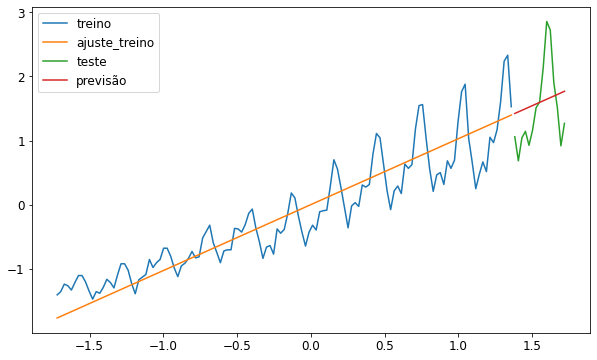

In [26]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')

sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xteste, y=y_predict_teste[:,0], label='previsão')


# Nova concepção do problema

Ao invés de prever o número de passageiros segundo a data, podemos tentar prever o número de passageiros dado a sequencia anterior de passageiros.

> "Passar os valores de y tanto como entrada quanto como saída. A entrada deve ter uma série de valores anteriores para predizer um valor futuro."

## Construção das sequencias

In [27]:
import numpy as np

def separa_dados(vetor,n_passos):
    """Entrada: vetor: número de passageiros
                n_passos: número de passos no regressor
        Saída:
                X_novo: Array 2D 
                y_novo: Array 1D - Nosso alvo
    """
    X_novo, y_novo = [], []
    vetor_length = vetor.shape[0]
    for i in range(n_passos, vetor_length):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
    return X_novo, y_novo

In [28]:
# TREINO
vetor_treino = pd.DataFrame(ytreino)[0]

xtreino_novo, ytreino_novo = separa_dados(vetor_treino, 1)

In [29]:
xtreino_novo[:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [30]:
ytreino_novo[:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [31]:
# TESTE
vetor_teste = pd.DataFrame(yteste)[0]
xteste_novo, yteste_novo = separa_dados(vetor_teste, 1)

## Treinando modelo

In [32]:
regressor3 = Sequential()

regressor3.add(Dense(
    units=8, input_dim=1,
    kernel_initializer='ones',
    activation='linear',
    use_bias=False
))
regressor3.add(Dense(
    units=64,
    kernel_initializer='random_uniform',
    activation='sigmoid',
    use_bias=False
))
regressor3.add(Dense(
    units=1,
    kernel_initializer='random_uniform',
    activation='linear',
    use_bias=False
))

regressor3.compile(loss='mean_squared_error', optimizer='adam')

regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)
y_predict_novo = regressor3.predict(xtreino_novo)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 0.7903
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7617
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7412
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7229
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7041
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6843
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6610
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6396
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6104
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5814
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5502
Epoch 12/100
4/4 [==============================] - 0s 8ms/step - loss: 0.5183
Epoch 13/100
4/4 [==============================] - 0s 10ms/s

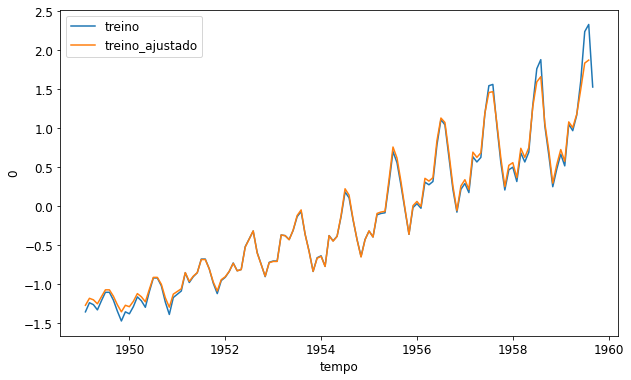

In [33]:
_dados_treino_passo = passageiros[1:129]

sns.lineplot(x='tempo', y=ytreino_novo, data=_dados_treino_passo, label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=_dados_treino_passo, label='treino_ajustado')

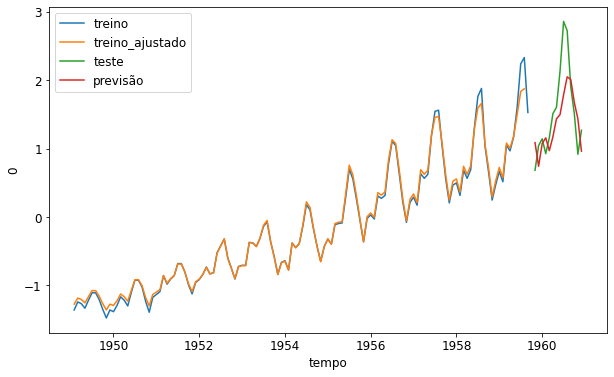

In [34]:
y_predict_teste_novo = regressor3.predict(xteste_novo)


_dados_treino_passo = passageiros[1 : 129]
_dados_teste_passo = passageiros[129+1 : 144]

# Treino
sns.lineplot(x='tempo', y=ytreino_novo, label='treino', data=_dados_treino_passo)
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], label='treino_ajustado', data=_dados_treino_passo)
# Teste
sns.lineplot(x='tempo', y=yteste_novo, label='teste', data=_dados_teste_passo)
sns.lineplot(x='tempo', y=y_predict_teste_novo[:,0], label='previsão', data=_dados_teste_passo)

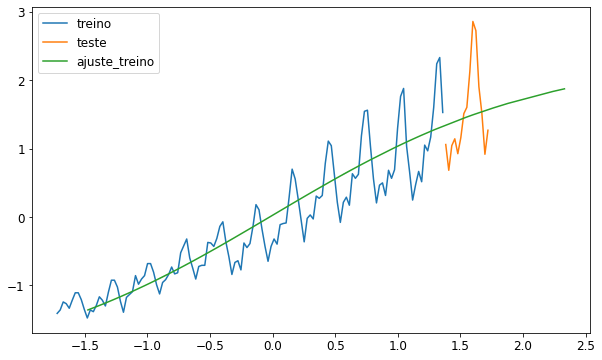

In [35]:
# !!! Não faz sentido a comparação - 
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')

sns.lineplot(x=xtreino_novo[:,0], y=y_predict_novo[:,0], label='ajuste_treino')


# Modelo Multiplos passados (janelas)

In [36]:
xtreino_w4, ytreino_w4 = separa_dados(vetor_treino, 4)
xteste_w4, yteste_w4 = separa_dados(vetor_teste, 4)

In [37]:
regressor4 = Sequential()

regressor4.add(Dense(
    units=8, input_dim=4,  # -----
    kernel_initializer='ones',
    activation='linear',
    use_bias=False
))
regressor4.add(Dense(
    units=64,
    kernel_initializer='random_uniform',
    activation='sigmoid',
    use_bias=False
))
regressor4.add(Dense(
    units=1,
    kernel_initializer='random_uniform',
    activation='linear',
    use_bias=False
))

regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
regressor4.fit(xtreino_w4, ytreino_w4, epochs=300)

y_predict_treino_w4 = regressor4.predict(xtreino_w4)
y_predict_teste_w4 = regressor4.predict(xteste_w4)

Epoch 1/300
4/4 [==============================] - 1s 5ms/step - loss: 0.7475
Epoch 2/300
4/4 [==============================] - 0s 11ms/step - loss: 0.6542
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 0.5805
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 0.5172
Epoch 5/300
4/4 [==============================] - 0s 8ms/step - loss: 0.4550
Epoch 6/300
4/4 [==============================] - 0s 9ms/step - loss: 0.3920
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 0.3362
Epoch 8/300
4/4 [==============================] - 0s 8ms/step - loss: 0.2777
Epoch 9/300
4/4 [==============================] - 0s 12ms/step - loss: 0.2314
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1965
Epoch 11/300
4/4 [==============================] - 0s 6ms/step - loss: 0.1713
Epoch 12/300
4/4 [==============================] - 0s 7ms/step - loss: 0.1549
Epoch 13/300
4/4 [==============================] - 0s 11ms

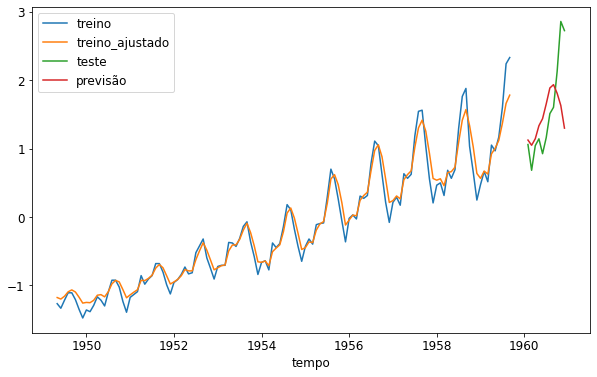

In [39]:
w = 4
_dados_treino_passo = passageiros[w : 129]
_dados_teste_passo = passageiros[129+w : 144]

resultado_treino = pd.DataFrame(y_predict_treino_w4)[0].values
resultado_teste = y_predict_teste_w4[:,0]

# Treino
sns.lineplot(x='tempo', y=xtreino_w4[:,-1], label='treino', data=_dados_treino_passo)
sns.lineplot(x='tempo', y=resultado_treino, label='treino_ajustado', data=_dados_treino_passo)
# Teste
sns.lineplot(x='tempo', y=xteste_w4[:,0], label='teste', data=_dados_teste_passo)
sns.lineplot(x='tempo', y=resultado_teste, label='previsão', data=_dados_teste_passo)

# Redes Neurais Recorrentes

A arquitetura de rede não entende o caráter **sequencial** das séries temporais, onde cada uma ds observações está correlacionada. Esta correlação pode ser entendida como um espécie de memória do que ocorreu na própria série temporal.

As **redes recorrentes** surgiram como uma alternativa para processamento de sequências. Neste tipo de processamento, o aprendizado ocorre por meio de *loops*.



![Redes Recorrentes](https://lh4.googleusercontent.com/Tm4H47qzhm69HOspl4H8w2xFMKQrEJPiLT44cQk-Qzd6Be1Uj-_HJ9ka12yoKKqGop0VoYjTeeYqYc5a1i-8viGcyyqr8L2pFbb1HgU4NOvAfIboyLyFxrlBn2y-wyrm0_S8hAKeStxh4yq7nVkCdfI)

In [40]:
import pandas as pd
import seaborn as sns

In [41]:
uri = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv'

bikes = pd.read_csv(uri)
bikes.sample(3)

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
11071,2016-04-12 04:00:00,25,9.0,7.5,94.0,10.0,7.0,0.0,0.0,0.0
478,2015-01-23 23:00:00,299,8.0,4.0,87.0,24.0,7.0,0.0,0.0,3.0
5635,2015-08-27 10:00:00,999,17.5,17.5,72.5,24.0,2.0,0.0,0.0,1.0


In [42]:
bikes.dtypes

datas           object
contagem         int64
temperatura    float64
sensacao       float64
umidade        float64
vel_vento      float64
clima          float64
feriado        float64
final_ds       float64
estacao        float64
dtype: object

In [43]:
bikes['datas'] = pd.to_datetime(bikes['datas'])

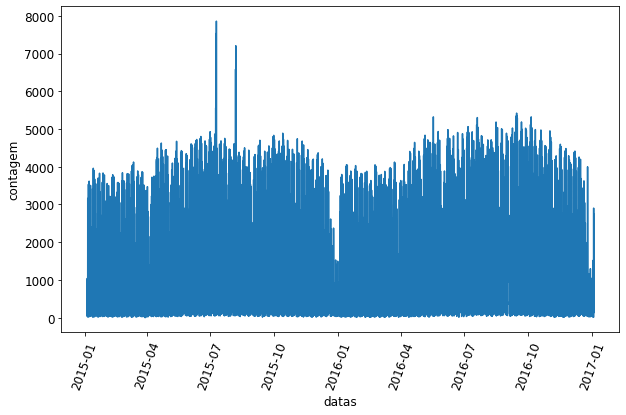

In [44]:
ax = sns.lineplot(x='datas', y='contagem', data=bikes)
plt.xticks(rotation=70)
ax=ax

In [45]:
from sklearn.preprocessing import StandardScaler

sc_bikes = StandardScaler()
data = bikes['contagem'].values.reshape(-1,1)  # values -> array; reshape -> itens dentro de lista em uma grande lista
sc_bikes.fit(data)

StandardScaler()

In [46]:
# Vetor y
y = sc_bikes.transform(data)

In [47]:
# Treino e Teste de y
tamanho_treino = int(len(y) * 0.9)

ytreino = y[:tamanho_treino]
yteste  = y[tamanho_treino:]

In [48]:
# Treino e Teste de x
xtreino = bikes[['datas']][:tamanho_treino]
xteste  = bikes[['datas']][tamanho_treino:]

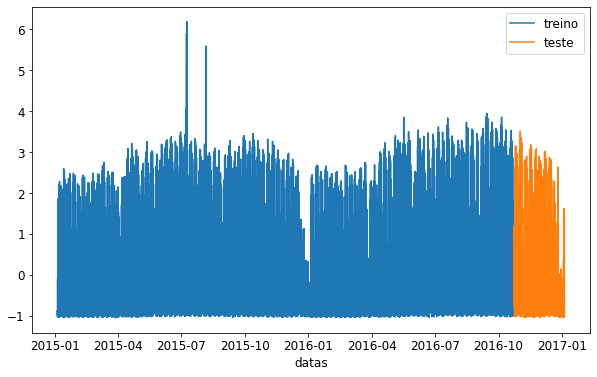

In [49]:
# Visualização
sns.lineplot(x='datas', y=ytreino[:,0], label='treino', data=xtreino)
sns.lineplot(x='datas', y=yteste[:,0],  label='teste', data=xteste)
plt.show()

## Janelas de deslocamento

In [50]:
# Vetor 
vetor_treino = pd.DataFrame(ytreino)[0]
vetor_teste = pd.DataFrame(yteste)[0]

In [51]:
# Sequencia de subvetores com deslocamento
xtreino_w10, ytreino_w10 = separa_dados(vetor_treino, 10)
xteste_w10, yteste_w10 = separa_dados(vetor_teste, 10)

## Estrutura de dados para Redes Recorrentes

In [52]:
treino_0 = xtreino_w10.shape[0]
treino_1 = xtreino_w10.shape[1]
xtreino_w10_rr = xtreino_w10.reshape((treino_0, treino_1, 1))

In [53]:
teste_0 = xteste_w10.shape[0]
teste_1 = xteste_w10.shape[1]
xteste_w10_rr = xteste_w10.reshape((teste_0, teste_1, 1))

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

recorrente = Sequential()

recorrente.add(LSTM(
    units=128,  # equivalente a loops
    input_shape=(treino_1, 1)
))
recorrente.add(Dense(
    units=1
))

recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [55]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


**LSTM** - Long Short Term Memory, destinado para estruturar uma memória de longo prazo.

Devido aos loops os pesos podem deixar de diminírem. Este processo é chamado de gradientes esvaindo, *vanishing gradient*. O uso do Glorot Uniform e do LSTM auxiliam em evitar esse fenômeno.

`activate_r

**RMSprop** - serve para evitar que o gradiente cresça muito

> Foi escolhido o RMSProp como otimizador dos pesos no treinamento da rede neural. O objetivo foi utilizar um otimizador adaptativo. Um otimizador adaptativo é capaz de controlar o gradiente e evitar que este cresça ou diminua muito. Entretanto, a escolha do RMSProp foi feita para chamar a atenção sobre o otimizador. Tanto o Adam quanto o RMSProp são adaptativos e seriam boas escolhas para a solução do problema.

[Outros otimizadores do Keras](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [57]:
# Treinamento da rede
resultado = recorrente.fit(xtreino_w10_rr, ytreino_w10, 
    validation_data=(xteste_w10_rr, yteste_w10),
    epochs=100)

Epoch 1/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0769 - val_loss: 0.0356
Epoch 2/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0547 - val_loss: 0.0404
Epoch 3/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0468 - val_loss: 0.0245
Epoch 4/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0423 - val_loss: 0.0313
Epoch 5/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0398 - val_loss: 0.0258
Epoch 6/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0374 - val_loss: 0.0219
Epoch 7/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0356 - val_loss: 0.0214
Epoch 8/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0336 - val_loss: 0.0213
Epoch 9/100
490/490 [==============================] - 6s 13ms/step - loss: 0.0329 - val_loss: 0.0322
Epoch 10/100
490/490 [==============================] - 6s 13ms/step - loss: 0.031

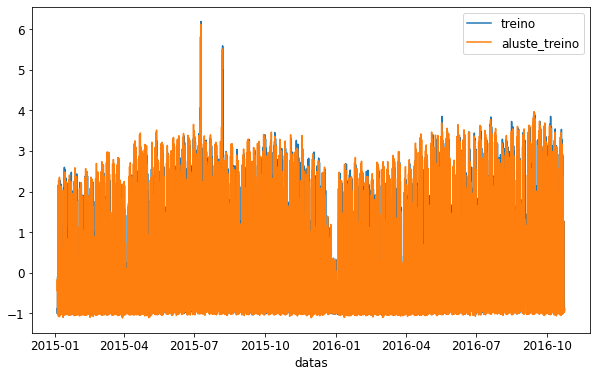

In [58]:
y_ajustado = recorrente.predict(xtreino_w10_rr)

sns.lineplot(x='datas', y=ytreino[:,0],
    data=bikes[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0],
    data=bikes[0:15662], label='aluste_treino')

plt.xticks(rotation=70)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

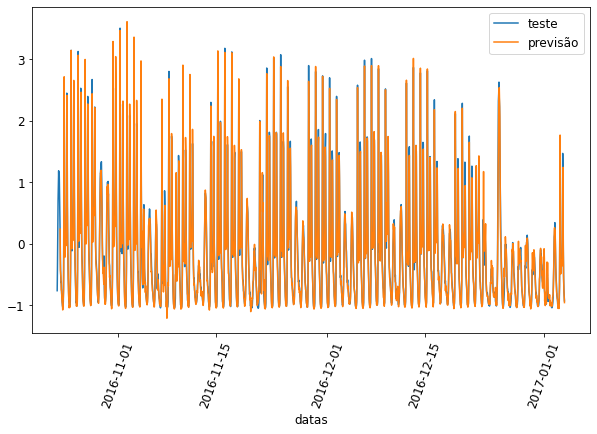

In [59]:
y_predito = recorrente.predict(xteste_w10_rr)

sns.lineplot(x='datas', y=yteste[:,0],
    data=bikes[tamanho_treino:len(bikes)], label='teste')
sns.lineplot(x='datas', y=y_predito[:,0],
    data=bikes[tamanho_treino+10:len(bikes)], label='previsão')

plt.xticks(rotation=70)

# Unidade recorrente fechada (GRU)

* Treinamento mais rápido, por ter menos parâmetros;
* LSTM conseguem lembrar sequencias maiores;

In [64]:
from tensorflow.keras.layers import GRU

recorrente_g = Sequential()

recorrente_g.add(GRU(
    128,
    input_shape=(xtreino_w10_rr.shape[1], xtreino_w10_rr.shape[2]),
))
recorrente_g.add(Dense(
    units=1
))

recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp' )

In [62]:
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [65]:
%%time
resultado_g = recorrente_g.fit(xtreino_w10_rr, ytreino_w10, 
    validation_data=(xteste_w10_rr, yteste_w10),
    epochs=100)

Epoch 1/100
490/490 [==============================] - 8s 12ms/step - loss: 0.2148 - val_loss: 0.0736
Epoch 2/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0696 - val_loss: 0.0558
Epoch 3/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0501 - val_loss: 0.0345
Epoch 4/100
490/490 [==============================] - 6s 11ms/step - loss: 0.0430 - val_loss: 0.0284
Epoch 5/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0396 - val_loss: 0.0228
Epoch 6/100
490/490 [==============================] - 6s 12ms/step - loss: 0.0369 - val_loss: 0.0268
Epoch 7/100
490/490 [==============================] - 9s 18ms/step - loss: 0.0353 - val_loss: 0.0205
Epoch 8/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0337 - val_loss: 0.0231
Epoch 9/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0323 - val_loss: 0.0193
Epoch 10/100
490/490 [==============================] - 6s 12ms/step - loss: 0.031

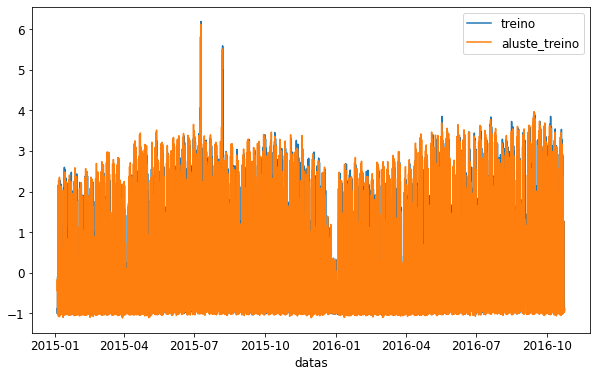

In [ ]:
y_ajustado_g = recorrente_g.predict(xtreino_w10_rr)

sns.lineplot(x='datas', y=ytreino[:,0],
    data=bikes[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado_g[:,0],
    data=bikes[0:15662], label='aluste_treino')

plt.xticks(rotation=70)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

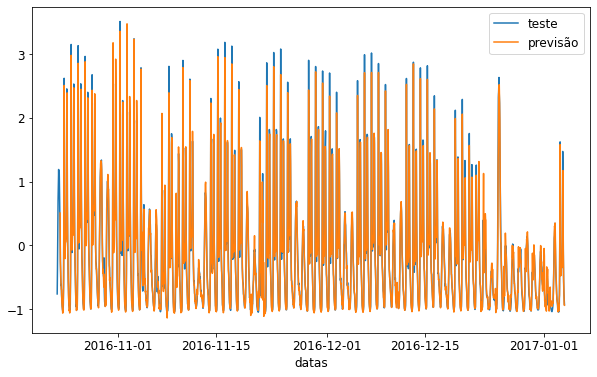

In [66]:
y_predito_g = recorrente_g.predict(xteste_w10_rr)

sns.lineplot(x='datas', y=yteste[:,0],
    data=bikes[tamanho_treino:len(bikes)], label='teste')
sns.lineplot(x='datas', y=y_predito_g[:,0],
    data=bikes[tamanho_treino+10:len(bikes)], label='previsão')

plt.xticks(rotation=0)

In [67]:
print(resultado_g.history.keys())

dict_keys(['loss', 'val_loss'])


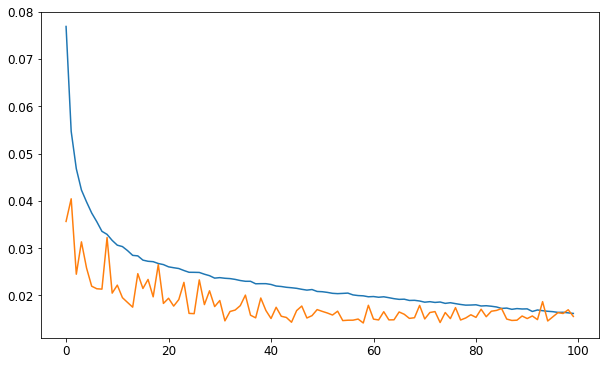

In [68]:
# LSTM
plt.plot(resultado.history['loss'])  # treino
plt.plot(resultado.history['val_loss'])  # teste

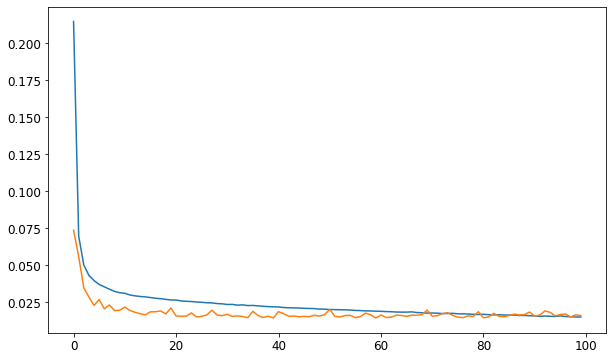

In [69]:
# GRU
plt.plot(resultado_g.history['loss'])  # treino
plt.plot(resultado_g.history['val_loss'])  # teste
plt.legend(['treino', 'teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')

No sobreajuste ocorre um ajuste muito bom aos dados de treino e ruim aos dados de teste.